<a href="https://colab.research.google.com/github/pri538/NP-Projects/blob/main/Language_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install tensorflow pandas scikit-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow as tf
from scipy.sparse import csr_matrix
import pickle

import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv("/content/Language Detection.csv")
df.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [ ]:
df.shape

(10337, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [ ]:
df.isnull().sum()

Text        0
Language    0
dtype: int64

In [ ]:
df[df.duplicated()]

,Text,Language
1141,i'm sorry.,English
1180,oh my god.,English
1196,i'm sorry.,English
1724,എന്നോട് ക്ഷമിക്കൂ.,Malayalam
1767,ഓ എന്റെ ദൈവമേ.,Malayalam
...,...,...
9706,Ach du lieber Gott.,German
9726,Es tut mir Leid.,German
10081,ನನ್ನನ್ನು ಕ್ಷಮಿಸು.,Kannada
10125,ಓ ದೇವರೇ.,Kannada


In [ ]:
len(df[df.duplicated()])

66

In [ ]:
df.drop(df[df.duplicated()].index, axis=0, inplace=True)

In [ ]:
df.shape

(10271, 2)

In [ ]:
df["Language"].nunique()

17

In [ ]:
df["Language"].value_counts()

English       1382
French        1007
Spanish        816
Portugeese     736
Italian        694
Russian        688
Sweedish       673
Malayalam      591
Dutch          542
Arabic         532
Turkish        471
German         465
Tamil          464
Danish         424
Kannada        366
Greek          358
Hindi           62
Name: Language, dtype: int64

In [ ]:
language_counts = df["Language"].value_counts().reset_index()
language_counts.columns = ["Language", "Count"]

# Display the new DataFrame
print(language_counts)

      Language  Count
0      English   1382
1       French   1007
2      Spanish    816
3   Portugeese    736
4      Italian    694
5      Russian    688
6     Sweedish    673
7    Malayalam    591
8        Dutch    542
9       Arabic    532
10     Turkish    471
11      German    465
12       Tamil    464
13      Danish    424
14     Kannada    366
15       Greek    358
16       Hindi     62


<ipython-input-14-3efe19c42910>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(x= 'Language', data= df, order= df['Language'].value_counts().index, palette= 'magma')


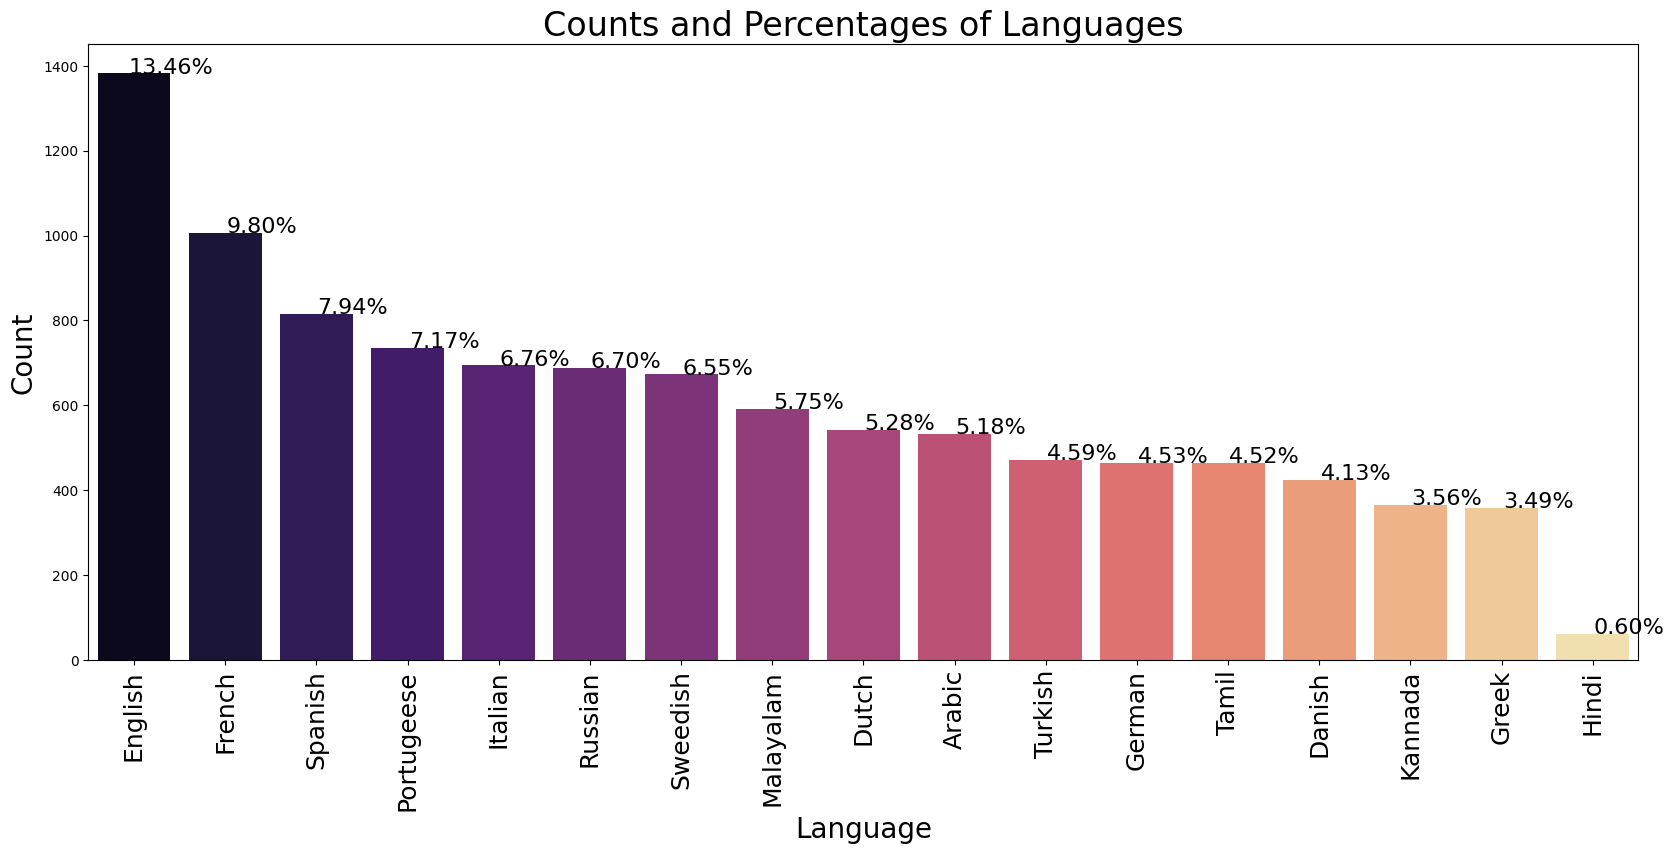

In [ ]:
plt.figure(figsize=(20,8))

total= float(len(df['Language']))
ax= sns.countplot(x= 'Language', data= df, order= df['Language'].value_counts().index, palette= 'magma')

for p in ax.patches:
    percentage= '{:.2f}%'.format(100 * p.get_height()/total)
    x= p.get_x() + p.get_width()
    y= p.get_height()
    ax.annotate(percentage, (x, y), fontsize=16, ha='center')

plt.title('Counts and Percentages of Languages', fontsize=24)
plt.xlabel("Language",fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(size= 18, rotation=90)
plt.show()

<ipython-input-32-b2f7f36fc496>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Language', data=language_counts, palette='muted')


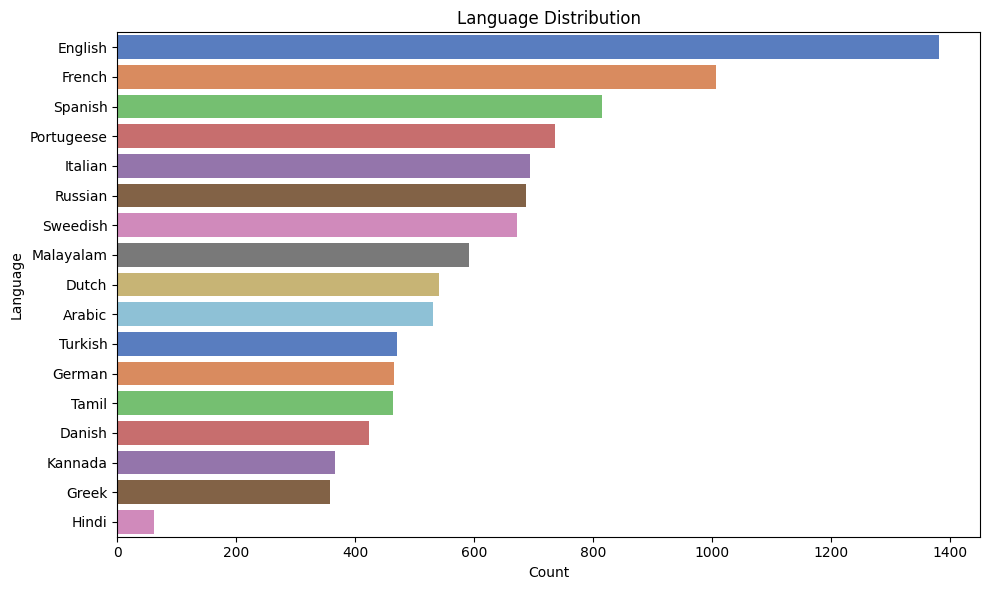

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Language', data=language_counts, palette='muted')
plt.xlabel('Count')
plt.ylabel('Language')
plt.title('Language Distribution')
plt.tight_layout()
plt.show()

In [ ]:
language= df['Language'].value_counts().reset_index()
language

,index,Language
0,English,1382
1,French,1007
2,Spanish,816
3,Portugeese,736
4,Italian,694
5,Russian,688
6,Sweedish,673
7,Malayalam,591
8,Dutch,542
9,Arabic,532


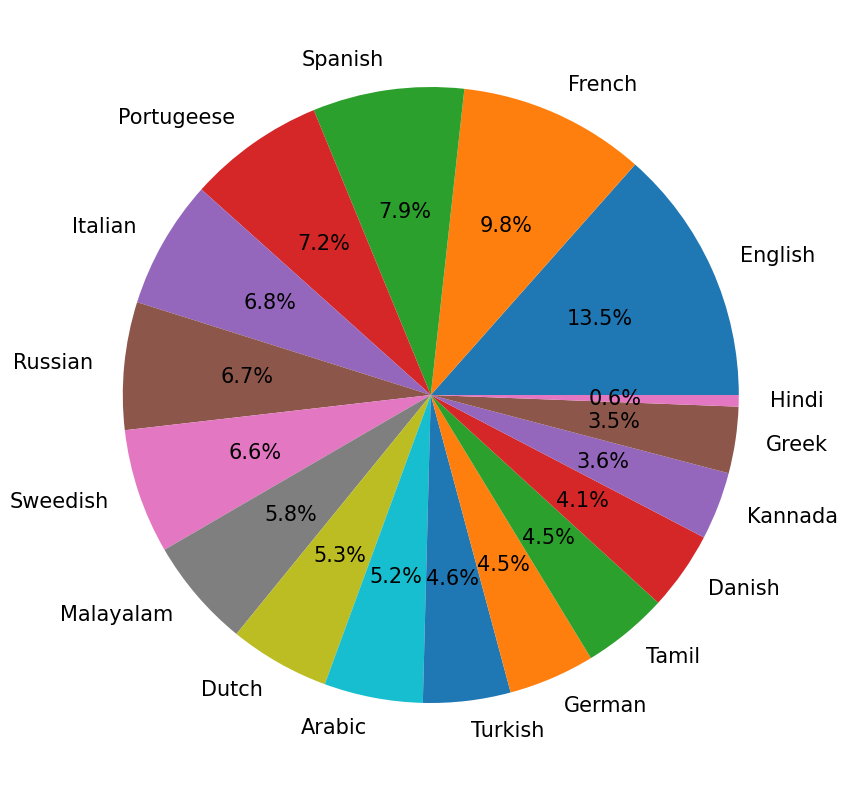

In [ ]:
plt.figure(figsize=(10,10))

#create pie chart
labels= language['index']

plt.pie(language["Language"], labels= labels, autopct='%.1f%%', textprops={'fontsize': 15})

plt.show()

In [ ]:
# splitting the df to test and train data
train_texts, test_texts, train_labels, test_labels = train_test_split(df['Text'], df['Language'], test_size=0.2, random_state=42)

In [ ]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)

In [ ]:
# Encode the language labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_labels)
y_test = label_encoder.transform(test_labels)

In [ ]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])
#rectified linear unit (ReLU)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Convert sparse matrices to TensorFlow Sparse Tensors

X_train_sparse = tf.convert_to_tensor(csr_matrix(X_train).todense(), dtype=tf.float32)
X_val_sparse = tf.convert_to_tensor(csr_matrix(X_val).todense(), dtype=tf.float32)
X_test_sparse = tf.convert_to_tensor(csr_matrix(X_test).todense(), dtype=tf.float32)

In [ ]:
# Let's train the model using the train data

history = model.fit(X_train_sparse, y_train, epochs=10, batch_size=32, validation_data=(X_val_sparse, y_val))

Epoch 1/10
165/165 [==============================] - 15s 83ms/step - loss: 1.1206 - accuracy: 0.8364 - val_loss: 0.3065 - val_accuracy: 0.9498
Epoch 2/10
165/165 [==============================] - 13s 76ms/step - loss: 0.1487 - accuracy: 0.9867 - val_loss: 0.1917 - val_accuracy: 0.9650
Epoch 3/10
165/165 [==============================] - 11s 69ms/step - loss: 0.0520 - accuracy: 0.9977 - val_loss: 0.1685 - val_accuracy: 0.9589
Epoch 4/10
165/165 [==============================] - 12s 70ms/step - loss: 0.0250 - accuracy: 0.9987 - val_loss: 0.1567 - val_accuracy: 0.9597
Epoch 5/10
165/165 [==============================] - 11s 69ms/step - loss: 0.0144 - accuracy: 0.9989 - val_loss: 0.1544 - val_accuracy: 0.9597
Epoch 6/10
165/165 [==============================] - 12s 71ms/step - loss: 0.0098 - accuracy: 0.9990 - val_loss: 0.1551 - val_accuracy: 0.9582
Epoch 7/10
165/165 [==============================] - 12s 71ms/step - loss: 0.0079 - accuracy: 0.9989 - val_loss: 0.1532 - val_accuracy:

In [ ]:
# Time to Evaluate the model

predictions = model.predict(X_test)
y_pred = predictions.argmax(axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

65/65 [==============================] - 0s 3ms/step
Test Accuracy: 94.40%


In [ ]:
import numpy as np

# Let's create a function to test the model out
def predict_language(input_text):
    # Preprocess input text
    input_text = [input_text]
    input_vector = vectorizer.transform(input_text)
    input_sparse = tf.convert_to_tensor(input_vector.todense(), dtype=tf.float32)

    # Make prediction using the trained model
    predictions = model.predict(input_sparse)

    # Convert predicted index back to language label
    predicted_label_index = np.argmax(predictions)
    predicted_language = label_encoder.classes_[predicted_label_index]

    return predicted_language

In [ ]:
input_text = "Checking if this works"
predicted_language = predict_language(input_text)

print(f"The predicted language for '{input_text}' is: {predicted_language}")

1/1 [==============================] - 0s 108ms/step
The predicted language for 'Checking if this works' is: English


In [ ]:
input_text = "Hola Kaggle"
predicted_language = predict_language(input_text)

print(f"The predicted language for '{input_text}' is: {predicted_language}")

1/1 [==============================] - 0s 40ms/step
The predicted language for 'Hola Kaggle' is: Kannada


In [ ]:
input_text = "Wie geht es dir"
predicted_language = predict_language(input_text)

print(f"The predicted language for '{input_text}' is: {predicted_language}")

1/1 [==============================] - 0s 38ms/step
The predicted language for 'Wie geht es dir' is: German


In [ ]:
input_text = "как жизнь"
predicted_language = predict_language(input_text)

print(f"The predicted language for '{input_text}' is: {predicted_language}")

1/1 [==============================] - 0s 25ms/step
The predicted language for 'как жизнь' is: Russian


In [ ]:
df1= df.copy()
df1['cleaned_Text']= ""
df1

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,
1,"""Nature"" can refer to the phenomena of the phy...",English,
2,"The study of nature is a large, if not the onl...",English,
3,"Although humans are part of nature, human acti...",English,
4,[1] The word nature is borrowed from the Old F...,English,
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,


In [ ]:
import re
def clean_function(Text):
    # removing the symbols and numbers
    Text = re.sub(r'[\([{})\]!@#$,"%^*?:;~`0-9]', ' ', Text)

    # converting the text to lower case
    Text = Text.lower()
    Text = re.sub('http\S+\s*', ' ', Text)  # remove URLs
    Text = re.sub('RT|cc', ' ', Text)  # remove RT and cc
    Text = re.sub('#\S+', '', Text)  # remove hashtags
    Text = re.sub('@\S+', '  ', Text)  # remove mentions
    Text = re.sub('\s+', ' ', Text)  # remove extra whitespace

    return Text

In [ ]:
df1['cleaned_Text'] = df1['Text'].apply(lambda x: clean_function(x))
df1

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural p...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the phys...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the only...
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human activ...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old fren...
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...


In [ ]:
X= df1["cleaned_Text"]
y= df1["Language"]

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()

y= encoder.fit_transform(y)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
CV= CountVectorizer()
X= CV.fit_transform(X).toarray()
X.shape

(10271, 39370)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'MNB' : MultinomialNB()
}

In [ ]:
%%time
for name, model in models.items():
    print(f'{name} training started...')
    model.fit(X_train, y_train)
    print(f'{name} trained')

K-Nearest Neighbors training started...
K-Nearest Neighbors trained
Random Forest training started...
Random Forest trained
MNB training started...
MNB trained
CPU times: user 2min 34s, sys: 455 ms, total: 2min 35s
Wall time: 2min 42s


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report

In [ ]:
%%time
for name in models:
    acc_score= round(accuracy_score(y_test, models.get(name).predict(X_test)), 3)
    print(f'{name} accuracy score :  {acc_score}')

K-Nearest Neighbors accuracy score :  0.524
Random Forest accuracy score :  0.924
MNB accuracy score :  0.981
CPU times: user 1min 23s, sys: 5.41 s, total: 1min 29s
Wall time: 53.6 s


In [ ]:
for name in models:
    print(f'{name} classification report')
    print("-------------------------------")
    print(classification_report(y_test, models.get(name).predict(X_test)))
    print("******************************")
    print(" ")

K-Nearest Neighbors classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.58      0.35      0.44       146
           1       0.76      0.55      0.64       103
           2       0.87      0.46      0.60       133
           3       0.97      0.59      0.74       361
           4       0.89      0.56      0.69       255
           5       0.84      0.46      0.59       114
           6       1.00      0.48      0.65        79
           7       1.00      0.33      0.50        12
           8       0.97      0.45      0.61       159
           9       0.08      0.97      0.16        86
          10       0.81      0.72      0.76       161
          11       0.90      0.48      0.63       178
          12       0.79      0.29      0.43       150
          13       0.79      0.55      0.65       205
          14       0.99      0.49      0.66       182
          15       0.41      0.86      0.55       111
       

K-Nearest Neighbors ConfusionMatrix


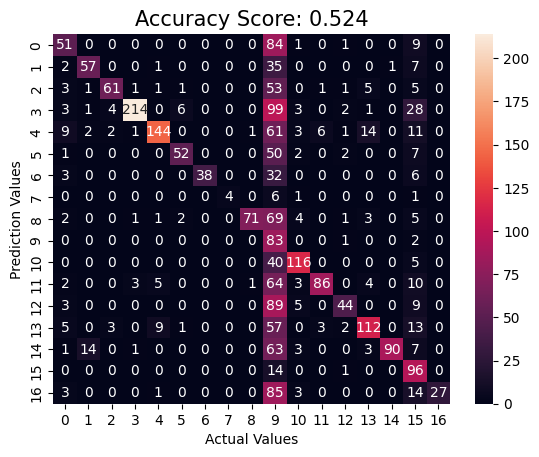

******************************
 
Random Forest ConfusionMatrix


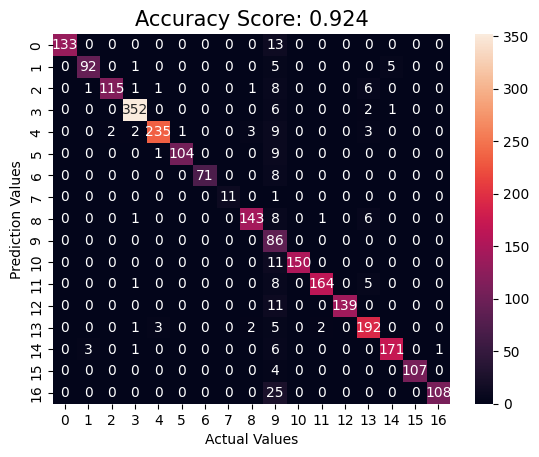

******************************
 
MNB ConfusionMatrix


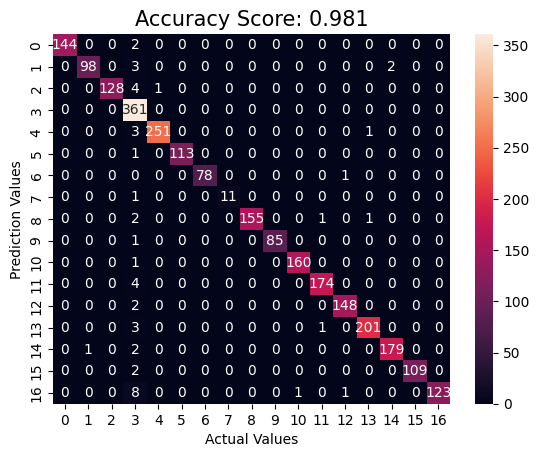

******************************
 


In [ ]:
for name in models:
    print(f'{name} ConfusionMatrix')
    predictions= models.get(name).predict(X_test)
    score = round(accuracy_score(y_test, models.get(name).predict(X_test)), 3)
    confusionMatrix = CM(y_test, models.get(name).predict(X_test))
    sns.heatmap(confusionMatrix, annot=True, fmt=".0f")
    plt.xlabel('Actual Values')
    plt.ylabel('Prediction Values')
    plt.title('Accuracy Score: {0}'.format(score), size = 15)
    plt.show()
    print("******************************")
    print(" ")

In [ ]:
def prediction(text):
    x= CV.transform([text]).toarray()
    lang= model.predict(x)
    lang= encoder.inverse_transform(lang)
    print("This word/sentence contains {} word(s).".format(lang[0]))

In [ ]:
prediction("Pri unum aliquam definitionem ei, dicant reprehendunt cu nec. Intellegat accommodare ea usu. Ius illum delenit quaerendum ei, pri assum nobis id, iriure deseruisse deterruisset ad nam")

This word/sentence contains Italian word(s).
